<a href="https://colab.research.google.com/github/wontan2000/wontan2000/blob/master/%EA%B8%88%EC%9C%B5%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    from google.colab import files
files.upload() # data.zip 업로드

Saving data.xls to data (1).xls


{'data.xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xbe\x00\x00\x00\x01\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00b\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\

In [ ]:
import pandas as pd
print(pd.__version__)

1.0.5


In [ ]:
df = pd.read_excel("data.xls")
df.tail(10)

,일자,현재지수,대비,등락률(%),배당수익률(%),주가이익비율,주가자산비율,시가지수,고가지수,저가지수,거래량(천주),거래대금(백만원),상장시가총액(백만원)
493,2010/10/27,1909.54,-9.87,-0.51,1.20,16.45,1.40,1919.48,1924.61,1902.18,392949,6836415,1059605447
494,2010/10/28,1907.87,-1.67,-0.09,1.21,16.44,1.40,1909.38,1914.89,1901.80,348383,5599971,1058786941
495,2010/10/29,1882.95,-24.92,-1.31,1.22,16.22,1.38,1913.61,1913.95,1875.31,375835,6067064,1045085747
496,2010/11/01,1914.74,31.79,1.69,1.20,16.50,1.40,1889.57,1914.74,1880.25,343303,6074095,1062600383
497,2010/11/02,1918.04,3.30,0.17,1.20,16.54,1.41,1912.28,1920.29,1907.18,340827,6498418,1064288619
498,2010/11/03,1935.97,17.93,0.93,1.19,16.69,1.42,1931.13,1943.23,1930.11,358980,6831168,1074183559
499,2010/11/04,1942.50,6.53,0.34,1.18,16.75,1.42,1941.56,1945.58,1936.04,324776,6432446,1078243937
500,2010/11/05,1938.96,-3.54,-0.18,1.19,16.72,1.42,1962.34,1966.99,1938.57,401398,7966855,1076478510
501,2010/11/08,1942.41,3.45,0.18,1.18,16.75,1.42,1946.76,1948.44,1930.29,312654,5493256,1078390143
502,2010/11/09,1947.46,5.05,0.26,1.18,16.84,1.43,1943.56,1947.66,1935.38,298819,6179718,1080933517


In [ ]:
df.dtypes

일자              object
현재지수           float64
대비             float64
등락률(%)         float64
배당수익률(%)       float64
주가이익비율         float64
주가자산비율         float64
시가지수           float64
고가지수           float64
저가지수           float64
거래량(천주)          int64
거래대금(백만원)        int64
상장시가총액(백만원)      int64
dtype: object

In [ ]:
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")

In [ ]:
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })

In [ ]:
df.columns

Index(['Date', 'CurrentI', 'ChangeI', 'CurrentPe', '배당수익률(%)', '주가이익비율',
       '주가자산비율', 'OpeningI', 'HighI', 'LowI', 'VolumeI', 'ValueI', 'MkrtValI'],
      dtype='object')

In [ ]:
df = df.set_index('Date')
df.head(3)

,CurrentI,ChangeI,CurrentPe,배당수익률(%),주가이익비율,주가자산비율,OpeningI,HighI,LowI,VolumeI,ValueI,MkrtValI
Date,,,,,,,,,,,,
2008-11-10,1152.46,17.97,1.58,2.57,9.18,0.96,1152.26,1165.57,1124.13,717484,7372464,585579198
2008-11-11,1128.73,-23.73,-2.06,2.62,8.99,0.94,1133.34,1160.30,1114.50,600726,5831800,573530673
2008-11-12,1123.86,-4.87,-0.43,2.63,8.95,0.94,1103.88,1143.18,1096.63,605657,5051821,571044100


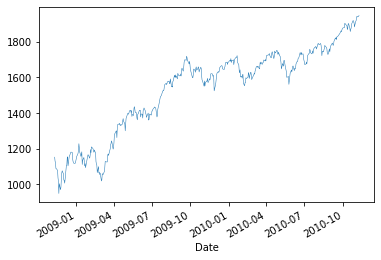

In [ ]:
## Time Series Plot (zoo in R)
df.CurrentI.plot(linewidth=0.5)

## 예제 13.1.2 
텍스트파일 KOSPI1.txt의 변수 CurrentI에 저장된 종가지수과정이 지수Brown 운동을 따르는지를 살펴보기 위해서, 다음을 실행하자.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, norm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)



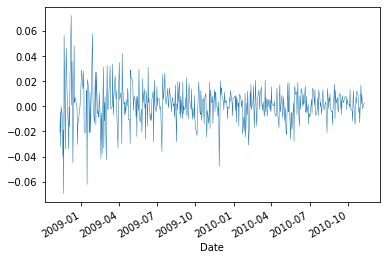

In [ ]:
## Time Series Plot
LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]
LogReturn.plot(linewidth=0.5)

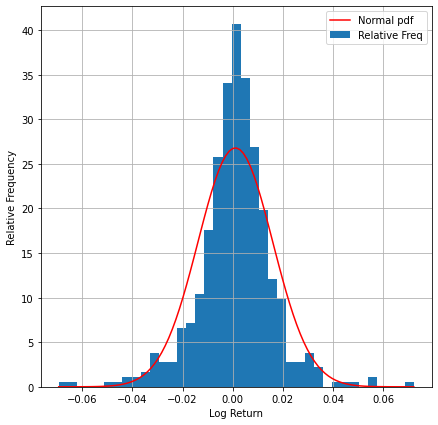

In [ ]:
## Moments
LRmean = np.mean(LogReturn)  # LRmean = mean(LogReturn)
LRstd = np.std(LogReturn)    # LRstd = sd(LogReturn)
LRskew = skew(LogReturn)     # LRskew = skewness(LogReturn)
LRkurt = kurtosis(LogReturn) # LRkurt = kurtosis(LogReturn)

## Plot Histogram
plt.figure(figsize=(7, 7))     # win.graph(width=7, height =7)
hist = LogReturn.hist(bins=39, density=True) # hist(LogReturn , breaks =40, freq=FALSE , xlab="Log Return",ylab=" Relative Frequency",main ="")

plt.xlabel("Log Return")
plt.ylabel("Relative Frequency")

x = np.linspace(np.min(LogReturn), np.max(LogReturn), 101) # x = seq(from=min(LogReturn), to=max(LogReturn), by =0.001)
y = norm(LRmean,LRstd).pdf(x)
plt.plot(x,y, color='red') # lines(x, dnorm(x,LRmean ,LRstd),lwd=2,col="red")
plt.legend(['Normal pdf', 'Relative Freq'])# legend (" topright", c(" Relative Freq", "Normal pdf"), col=c(" black","red"), lwd =2)


## 예제 13.1.3
KOSPI의 로그수익률 $\{x_m\}$이 정규확률분포를 따르는지를 살펴보기 위해서, 다음을 실행하자.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import probplot ## qqplot
from scipy.stats import kstest
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)

Text(0.5, 1.0, 'Normal Probability Plot')

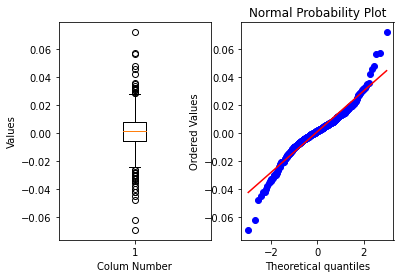

In [ ]:
## Plots
LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

ax1 = plt.subplot(1,2,1)
ax1.boxplot(LogReturn)
ax1.set_xlabel('Colum Number')
ax1.set_ylabel('Values')

ax2 = plt.subplot(1,2,2)
_ = probplot(LogReturn, plot=ax2)

ax2.set_title("Normal Probability Plot")
## x-y axis flip?

In [ ]:
## Normal Test
LRmean = np.mean(LogReturn) # LRmean = mean(LogReturn)
LRstd = np.std(LogReturn)
standLR = (LogReturn-LRmean)/LRstd
_, pvalue = kstest(standLR, 'norm')
print(f"Komogorov-Smirnov, p-value: {pvalue}")
lstat, l_pvalue = statsmodels.stats.diagnostic.lilliefors(standLR, dist='norm')
print(f"Lilliefor, p-value: {l_pvalue}")
statsmodels.stats.stattools.jarque_bera(standLR) ## Correct answer: 2.2e-16
# print(f"Jarque-Bera, p-value: {j_pvalue}")

Komogorov-Smirnov, p-value: 0.003009659310142162
Lilliefor, p-value: 3.405861823909421e-08


(257.16844277021005,
 1.434109103421076e-56,
 -0.1682077861839525,
 6.490233544208276)

## 예제 13.2.1 (`acf`)

KOSPI의로그수익률 $\{x_m\}$의자기상관함수를살펴보기위해서, 다음을 실행하자.

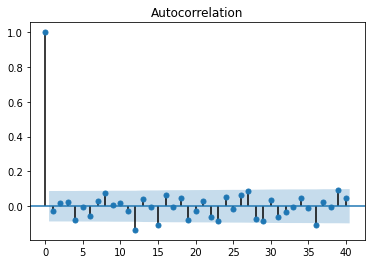

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)
## Plots
LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

sm.graphics.tsa.plot_acf(LogReturn, lags=40)
plt.show()



## 예제 13.2.2 (Durbin-Watson Test)
KOSPI의 로그수익률 $\{x_m\}$를 Durbin-Watson검정하기 위해서, 다음을 실행하자

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)

## Durbin-Watson Test
LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

## R과 달리 alternative hypothesis 를 줄수 없음. 
statsmodels.stats.stattools.durbin_watson(LogReturn)

2.0449373852699133

In [ ]:
## Python Linear Regression (In Progress)
from sklearn.linear_model import LinearRegression
X = np.array(range(1,DateNum)).reshape(-1,1)
LogReturn = np.array(LogReturn).reshape(-1,1)
line_fitter = LinearRegression()
line_fitter.fit(X, LogReturn)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 예제 13.2.3 

AR모형의 자기상관함수와 부분자기상관함수를 살펴보기 위해서, 다음을 실행하자.


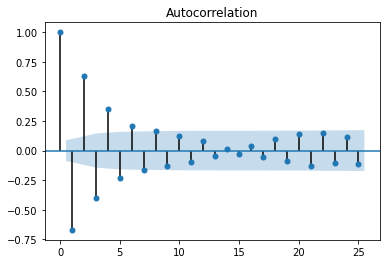

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

import random 
%matplotlib inline

random.seed(0) #set.seed(0) 
v = np.random.normal(0, 1, 500) #v = rnorm(500,0,1)
AR3 = np.zeros(3).reshape(-1,1) #AR3 = c(0,0,0)
for i in range(len(v)): #for (i in 1:500) { 
  AR3 = np.append(AR3, -0.5*AR3[i+2]+0.49*AR3[i+1]+0.245*AR3[i]+v[i]) #  AR3 = c(AR3, -0.5*AR3[i+2]+0.49*AR3[i+1]+0.245*AR3[i]+v[i]) 
#}
AR3 = AR3[3:]

## Plots
sm.graphics.tsa.plot_acf(AR3, lags=25)
plt.show()


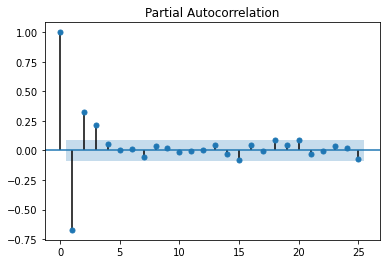

In [ ]:
## Plots -- pacf

sm.graphics.tsa.plot_pacf(AR3, lags=25)
plt.show()

## 예제 13.2.4 (`pacf`)
KOSPI의 로그수익률의 $\{x_m\}$의 부분자기상관함수를 살펴보기 위해서, 다음을 실행하자.

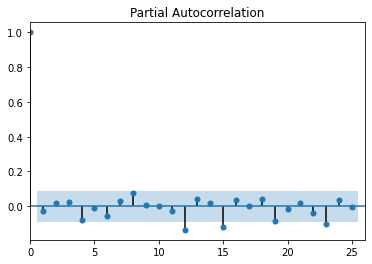

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)
## Plots
LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

sm.graphics.tsa.plot_pacf(LogReturn, lags=25)
# plt.xlim(LogReturn[1],LogReturn[:])
plt.xlim(0, 26)
plt.show()




## 예제 13.2.5 

KOSPI의로그수익률의 $\{x_m\}$ 의자기상관성을살펴보기위해서, 다음을 실행하자.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)



In [ ]:
## Ljung Box Test
LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

num = np.zeros(1).reshape(-1,1)
Qstat = np.zeros(1).reshape(-1,1)
pvalue = np.zeros(1).reshape(-1,1)
temp = np.zeros(1).reshape(-1,1)

for i in range(20):
  ## (R) Box.test 와 조금 다름. fitdf=5 를 규정할수없다. 
  temp = statsmodels.stats.diagnostic.acorr_ljungbox(LogReturn, lags=i+5, boxpierce=False)
  num = np.append(num, i+5)
  Qstat = np.append(Qstat, temp[0][0]) #  X-squared = c(Qstat, temp[1])
  pvalue = np.append(pvalue, temp[0][1]) # p-value =  c(pvalue, temp[3]

print(num)

[ 0.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24.]


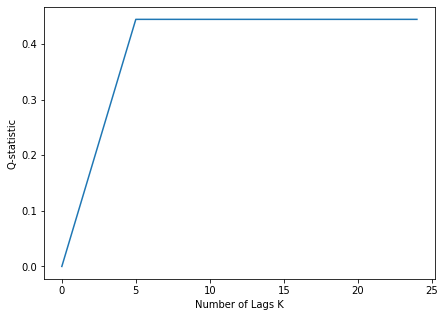

In [ ]:
## Plot (TBD) 
plt.figure(figsize=(7, 5))  
plt.xlabel("Number of Lags K")
plt.ylabel("Q-statistic")
plt.plot(num, Qstat)
plt.show()

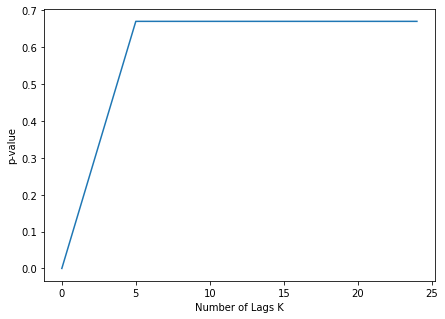

In [ ]:
## Plot (TBD)
plt.figure(figsize=(7, 5))  
plt.xlabel("Number of Lags K")
plt.ylabel("p-value")
plt.plot(num, pvalue)
plt.show()

## 예제 13.3.1 

MA모형의 자기상관함수와 부분자기상관함수를 살펴보기 위해서, 다음 R파일을 실행하자.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

import random 
%matplotlib inline

random.seed(0) #set.seed(0) 
v = np.append(0, np.random.normal(0, 1, 500)) #v = c(0,rnorm(500,0,1))
MA1 = np.zeros(1)  # MA1 = c()
for i in range(len(v)-1): #for (i in 1:500) { 
  MA1 = np.append(MA1, v[i+1]+0.4*v[i]) # MA1 = c(MA1, v[i+1]+0.4*v[i])



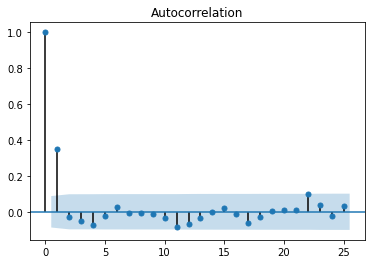

In [ ]:
## Plots
sm.graphics.tsa.plot_acf(MA1, lags=25)
plt.show()

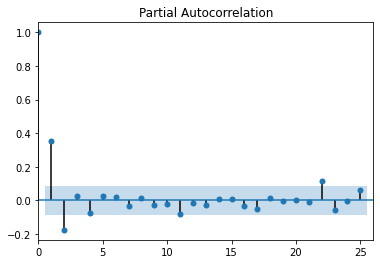

In [ ]:
## Plots
sm.graphics.tsa.plot_pacf(MA1, lags=25)
plt.xlim(0, 26)
plt.show()

## 예제 13.3.2 

ARMA모형의 자기상관함수와 부분자기상관함수를 살펴보기 위해서, 다음을 실행하자



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

import random 
%matplotlib inline

random.seed(0) #set.seed(0) 
v = np.append(0, np.random.normal(0, 1, 500)) #v = c(0,rnorm(500,0,1))
ARMA31 = np.zeros(3).reshape(-1,1) #AR3 = c(0,0,0)
for i in range(len(v)): #for (i in 1:500) { 
  ARMA31 = np.append(ARMA31, -0.5*ARMA31[i+2]+0.49*ARMA31[i+1]+0.245*ARMA31[i]+v[i]) #  AR3 = c(AR3, -0.5*AR3[i+2]+0.49*AR3[i+1]+0.245*AR3[i]+v[i]) 
#}
ARMA31 = ARMA31[3:]

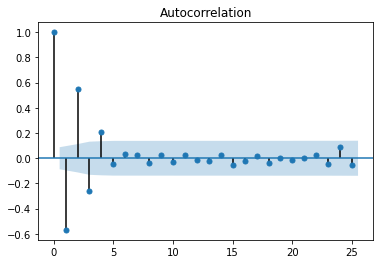

In [ ]:
## Plots
sm.graphics.tsa.plot_acf(ARMA31, lags=25)
plt.show()


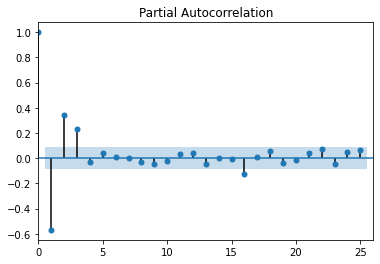

In [ ]:
## Plots
sm.graphics.tsa.plot_pacf(ARMA31, lags=25)
plt.xlim(0, 26)
plt.show()


## 예제 13.3.3 

ARMA모형의 추정에 대해서 살펴보기 위해서, 다음을 실행하자. (예제 13.3.2 연장)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

import random 
%matplotlib inline

random.seed(0) # set.seed(0) 
v = np.append(0, np.random.normal(0, 1, 500)) #v = c(0,rnorm(500,0,1))
ARMA31 = np.zeros(3).reshape(-1,1) #AR3 = c(0,0,0)
for i in range(len(v)): #for (i in 1:500) { 
  ARMA31 = np.append(ARMA31, -0.5*ARMA31[i+2]+0.49*ARMA31[i+1]+0.245*ARMA31[i]+v[i]) #  AR3 = c(AR3, -0.5*AR3[i+2]+0.49*AR3[i+1]+0.245*AR3[i]+v[i]) 
#}
ARMA31 = ARMA31[3:]

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  501
Model:                     ARMA(3, 1)   Log Likelihood                -719.004
Method:                       css-mle   S.D. of innovations              1.015
Date:                Sun, 09 Aug 2020   AIC                           1450.009
Time:                        13:32:46   BIC                           1475.308
Sample:                             0   HQIC                          1459.935
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0756      0.051     -1.486      0.138      -0.175       0.024
ar.L1.y       -0.6630      0.210     -3.153      0.002      -1.075      -0.251
ar.L2.y        0.3978      0.110      3.618      0.0

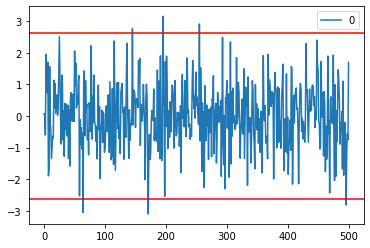

                0
count  501.000000
mean     0.000443
std      1.016214
min     -3.096505
25%     -0.642997
50%     -0.016055
75%      0.699065
max      3.158314


In [ ]:
## No option for including  mean in Python

# fit model
model = ARIMA(ARMA31, order=(3,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
sigma = np.std(residuals) # no option for removing NA
residuals.plot()
plt.axhline(y=2.6*sigma[0], color='r', linestyle='-')
plt.axhline(y=-2.6*sigma[0], color='r', linestyle='-')
plt.show()
# residuals.plot(kind='kde')
# plt.show()
print(residuals.describe())


## 예제 13.3.4 

ARMA모형의 식별에 대해서 다시 살펴보기 위해서, 다음을 실행하자

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

import random 
%matplotlib inline

random.seed(0) #set.seed(0) 
v = np.append(0, np.random.normal(0, 1, 500)) #v = c(0,rnorm(500,0,1))
ARMA31 = np.zeros(3).reshape(-1,1) #AR3 = c(0,0,0)
for i in range(len(v)): #for (i in 1:500) { 
  ARMA31 = np.append(ARMA31, -0.5*ARMA31[i+2]+0.49*ARMA31[i+1]+0.245*ARMA31[i]+v[i]) #  AR3 = c(AR3, -0.5*AR3[i+2]+0.49*AR3[i+1]+0.245*AR3[i]+v[i]) 
#}
ARMA31 = ARMA31[3:]

In [ ]:
 ## AIC and BIC for ARMA model estimation
AIC = np.zeros(1).reshape(-1,1)
BIC = np.zeros(1).reshape(-1,1)
for i in range(4):
  for j in range(4):
    # result = ARIMA(ARMA31, order=(i,0,j))
    # fit model
    model = ARIMA(ARMA31, order=(i,0,j))
    model_fit = model.fit(disp=0)
    AIC = np.append(AIC, model_fit.aic) # AIC = c(AIC, result[6])
    BIC = np.append(BIC, model_fit.bic) # BIC = c(BIC, result[16])

AIC = AIC[1:]
BIC = BIC[1:]

AIC = AIC.reshape(4,4); print(AIC)
BIC = BIC.reshape(4,4); print(BIC)

[[1690.9213103  1613.34955303 1423.97720351 1414.67994381]
 [1520.31469548 1461.97971684 1391.82201813 1383.25410061]
 [1394.16878557 1373.44945214 1371.36721881 1367.80396759]
 [1367.92626376 1369.24288085 1371.23125638 1371.33524721]]
[[1699.3545225  1625.99937133 1440.84362792 1435.76297431]
 [1532.96451378 1478.84614124 1412.90504864 1408.55373722]
 [1411.03520998 1394.53248265 1396.66685542 1397.3202103 ]
 [1389.00929426 1394.54251745 1400.74749909 1405.06809602]]


## 예제 13.3.5 

예제13.3.4에서는AIC와BIC를사용해서,시계열데이터ARMA31을ARMA(3, 1) 모형으로 식별하였다. 이 결과를 검진하기 위해서, 다음의 파일을 실행


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

import random 
%matplotlib inline

random.seed(0) #set.seed(0) 
v = np.append(0, np.random.normal(0, 1, 500)) #v = c(0,rnorm(500,0,1))
ARMA31 = np.zeros(3).reshape(-1,1) #AR3 = c(0,0,0)
for i in range(len(v)): #for (i in 1:500) { 
  ARMA31 = np.append(ARMA31, -0.5*ARMA31[i+2]+0.49*ARMA31[i+1]+0.245*ARMA31[i]+v[i]) #  AR3 = c(AR3, -0.5*AR3[i+2]+0.49*AR3[i+1]+0.245*AR3[i]+v[i]) 
#}
ARMA31 = ARMA31[3:]


In [ ]:
# fit model
model = ARIMA(ARMA31, order=(3,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)

num = np.zeros(1).reshape(-1,1)
Qstat = np.zeros(1).reshape(-1,1)
pvalue = np.zeros(1).reshape(-1,1)
temp = np.zeros(1).reshape(-1,1)

for i in range(21):
  ## (R) Box.test 와 조금 다름. fitdf=5 를 규정할수없다. 
  temp = statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=i+10, boxpierce=False)
  num = np.append(num, i+10)
  Qstat = np.append(Qstat, temp[0][0]) #  X-squared = c(Qstat, temp[1])
  pvalue = np.append(pvalue, temp[0][1]) # p-value =  c(pvalue, temp[3]


## Plot (TBD) 
plt.figure(figsize=(7, 5))  
plt.xlabel("Number of Lags K")
plt.ylabel("Q-statistic")
plt.plot(num, Qstat)
plt.show()

## Plot (TBD)
plt.figure(figsize=(7, 5))  
plt.xlabel("Number of Lags K")
plt.ylabel("p-value")
plt.plot(num, pvalue)
plt.show()


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  501
Model:                     ARMA(3, 1)   Log Likelihood                -675.120
Method:                       css-mle   S.D. of innovations              0.930
Date:                Sat, 15 Aug 2020   AIC                           1362.241
Time:                        06:57:59   BIC                           1387.540
Sample:                             0   HQIC                          1372.167
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.053      0.130      0.897      -0.097       0.111
ar.L1.y       -0.5114      0.190     -2.692      0.007      -0.884      -0.139
ar.L2.y        0.4999      0.087      5.722      0.0

NameError: ignored

# 제13.4절 비정상시계열

## 예제 13.4.3 

데이터파일 KOSPI1.txt의변수 CurrentI에저장된종가지수과정에대한 ADF 검정을 하기 위해서, 다음을 실행하자.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)

In [ ]:
## ADF Test 1

result = adfuller(np.log(df.CurrentI), maxlag=1, regression='nc')
print('============= ADF Test1: Lag 1, no constant, no trend (nc )===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

result = adfuller(np.log(df.CurrentI), maxlag=1, regression='ct')
print('============= ADF Test1: Lag 1, constant, trend (ct) ===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

result = adfuller(np.log(df.CurrentI), maxlag=1, regression='c')
print('============= ADF Test1: Lag 1, constant only (c) ===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

============= ADF Test1: Lag 1, no constant, no trend (nc )===============
regression :ADF Statistic: 1.545185
p-value: 0.969960
Critical Values:
	1%: -2.570
	5%: -1.942
	10%: -1.616
============= ADF Test1: Lag 1, constant, trend (ct) ===============
regression :ADF Statistic: -2.404967
p-value: 0.376981
Critical Values:
	1%: -3.977
	5%: -3.419
	10%: -3.132
============= ADF Test1: Lag 1, constant only (c) ===============
regression :ADF Statistic: -1.061355
p-value: 0.730234
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [ ]:
## ADF Test 2

result = adfuller(np.log(df.CurrentI), maxlag=0, regression='nc')
print('============= ADF Test1: Lag 0, no constant, no trend (nc )===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

result = adfuller(np.log(df.CurrentI), maxlag=0, regression='ct')
print('============= ADF Test1: Lag 0, constant, trend (ct) ===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

result = adfuller(np.log(df.CurrentI), maxlag=0, regression='c')
print('============= ADF Test1: Lag 0, constant only (c) ===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

============= ADF Test1: Lag 0, no constant, no trend (nc )===============
regression :ADF Statistic: 1.545185
p-value: 0.969960
Critical Values:
	1%: -2.570
	5%: -1.942
	10%: -1.616
============= ADF Test1: Lag 0, constant, trend (ct) ===============
regression :ADF Statistic: -2.404967
p-value: 0.376981
Critical Values:
	1%: -3.977
	5%: -3.419
	10%: -3.132
============= ADF Test1: Lag 0, constant only (c) ===============
regression :ADF Statistic: -1.061355
p-value: 0.730234
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [ ]:
## ADF Test 3

LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

result = adfuller(LogReturn, maxlag=1, regression='nc')
print('============= ADF Test1: Lag 1, no constant, no trend (nc )===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

result = adfuller(LogReturn, maxlag=1, regression='ct')
print('============= ADF Test1: Lag 1, constant, trend (ct) ===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

result = adfuller(LogReturn, maxlag=1, regression='c')
print('============= ADF Test1: Lag 1, constant only (c) ===============')
print('regression :ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

============= ADF Test1: Lag 1, no constant, no trend (nc )===============
regression :ADF Statistic: -22.957655
p-value: 0.000000
Critical Values:
	1%: -2.570
	5%: -1.942
	10%: -1.616
============= ADF Test1: Lag 1, constant, trend (ct) ===============
regression :ADF Statistic: -23.038881
p-value: 0.000000
Critical Values:
	1%: -3.977
	5%: -3.419
	10%: -3.132
============= ADF Test1: Lag 1, constant only (c) ===============
regression :ADF Statistic: -23.060269
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


## 예제 13.4.4 

데이터파일 KOSPI1.txt의 변수 CurrentI에 저장된 종가지수과정에 대한 PP 검정을 하기 위해서, 다음을 실행하자.

In [ ]:
!pip install arch

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from arch.unitroot import PhillipsPerron
import statsmodels.api as sm

%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)

In [ ]:
## PP Test 1

pp1 = PhillipsPerron(np.log(df.CurrentI))

print("========= Log(CurrentI)'s PP Test =========")
print("{0:s}".format(pp1.alternative_hypothesis))
print("{0}".format(pp1.critical_values))
print("P-Value: {0:0.4f}".format(pp1.pvalue))
print("{0}".format(pp1.null_hypothesis))
print("Stat: {0:0.4f}".format(pp1.stat))


========= Log(CurrentI)'s PP Test =========
The process is weakly stationary.
{'1%': -3.4434437319767452, '5%': -2.8673146875484368, '10%': -2.569845688481135}
P-Value: 0.7559
The process contains a unit root.
Stat: -0.9926


In [ ]:
## PP Test 2

LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

pp2 = PhillipsPerron(LogReturn)

print("========= LogReturn's PP Test =========")
print("{0:s}".format(pp2.alternative_hypothesis))
print("{0}".format(pp2.critical_values))
print("P-Value: {0:0.4f}".format(pp2.pvalue))
print("{0}".format(pp2.null_hypothesis))
print("Stat: {0:0.4f}".format(pp2.stat))


========= LogReturn's PP Test =========
The process is weakly stationary.
{'1%': -3.443470002903981, '5%': -2.867326248740681, '10%': -2.569851849873108}
P-Value: 0.0000
The process contains a unit root.
Stat: -23.1988


## 예제 13.5.1  (TBD)

데이터파일 KOSPI1.txt의변수 LogReturn에저장된 KOSPI의로그수익률을 ARCH검정하기 위해서, 다음 R-파일을 실행하자.




** FinTS.ArchTest (R) 과 arch.arch_model (Python) 간의 차이로 아래의 코드는 현재 부정확**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from arch import arch_model

%matplotlib inline

df = pd.read_excel("data.xls")
# 문자열(object)을 datetime64 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d", errors="raise")
# 열이름 재지정. 한글이름은 `set_index` 등 함수 호출시 에러 발생 
df = df.rename(columns={
    "일자": "Date", 
    "현재지수": "CurrentI",
    "대비": "ChangeI",
    "등락률(%)": "CurrentPe",
    "시가지수": "OpeningI", 
    "고가지수": "HighI",
    "저가지수": "LowI", 
    "거래량(천주)": "VolumeI",
    "거래대금(백만원)": "ValueI",
    "상장시가총액(백만원)": "MkrtValI"
    })
Date = df['Date']
df = df.set_index('Date')
DateNum = len(Date)

LogReturn = np.log(df.CurrentI) - np.log(df.CurrentI.shift(1))
LogReturn = LogReturn[1:]

In [ ]:
## ARCH Test

TestStat = np.zeros(1).reshape(-1,1)

for i in range(10):
  am = arch_model(LogReturn, lags=i+1) 
  res = am.fit()
  #TODO: Concatenate the value of test statistics to TestStat

## Plot (TODO: x: Number of Lag, y: Statistics)


## 예제 13.5.2 (Left for Excercise)

GARCH모형을사용해서 KOSPI의로그수익율을모형화하기위해서, 다음 R파일을 실행하자




In [ ]:
print(res.tvalues)

mu          1.896943e+00
omega       3.554698e+00
alpha[1]    1.670047e-11
beta[1]     3.277871e+01
Name: tvalues, dtype: float64
